## Regression part a


### 1:

Explain what variable is predicted based on which other variables and what
you hope to accomplish by the regression. Mention your feature transformation
choices such as one-of-K coding. Since we will use regularization momentarily,
apply a feature transformation to your data matrix X such that each column
has mean 0 and standard deviation 1.


In [137]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

In [138]:
%store -r data

1. Split your data into features (independent variables) and the target variable (Gross)


In [139]:
X = data.drop("Gross", axis=1)  # Features (indipendent variables)
X = X.drop(columns="title")
y = data["Gross"]  # Target variable (dipendent variable)

In [140]:
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler to your feature matrix and transform it
X_scaled = scaler.fit_transform(X)

In [141]:
N = X_scaled.shape[1]
N

7

In [142]:
# Xc = X - np.ones((N, 1)) * X.mean(axis=0)
# Xc = Xc * (1 / np.std(X, 0))

2. Define a range of values for the regularization parameter λ (alpha) that you want to test


In [231]:
alphas = [
    # 1e-15,
    # 1e-10,
    # 1e-8,
    # 1e-3,
    # 1e-2,
    1,
    5,
    10,
    20,
    30,
    35,
    40,
    45,
    50,
    55,
    100,
    110,
    120,
    125,
    130,
    135,
    150,
    170,
    190,
    200,
    220,
    250,
    300,
    400,
    450,
    500,
    550,
    600,
    650,
    700,
    750,
    800,
    900,
    1000,
    2000,
    3000,
    4000,
    5000,
    6000,
    10000,
    15000,
    20000,
    30000,
    50000,
    70000,
    100000,
    10000000,
]

3. Perform 10-fold cross-validation with Ridge regression for each value of λ


In [245]:
results = {}  # Dictionary to store the results for each α
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)
    scores = cross_val_score(
        ridge, X_scaled, y, cv=kfold, scoring="neg_mean_squared_error"
    )
    results[alpha] = -scores.mean()  # Store the negative mean squared error

4. Find the λ that gives the lowest generalization error


In [246]:
best_alpha = min(results, key=results.get)
best_error = results[best_alpha]
print(f"Best alpha: {best_alpha}")
print(f"Best error: {best_error}")

Best alpha: 40
Best error: 5.019106974351129e+16


In [247]:
final_model = Ridge(alpha=best_alpha)
final_model.fit(X_scaled, y)

Ridge(alpha=40)

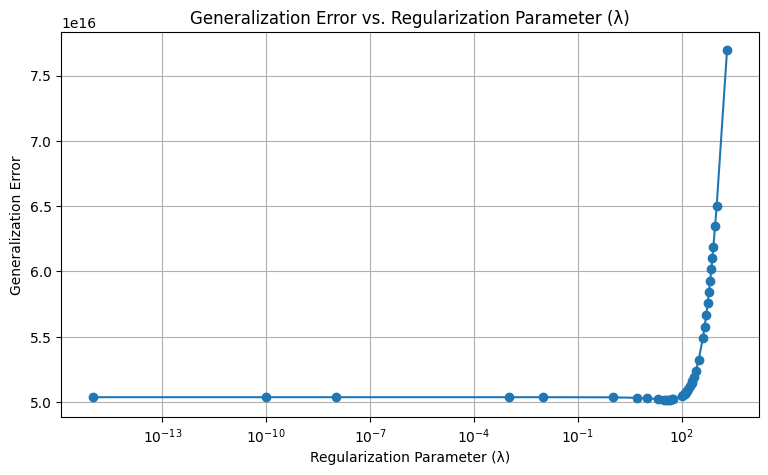

In [248]:
# Extract the alpha values and corresponding errors
alphas = list(results.keys())
errors = [
    results[alpha] for alpha in alphas
]  # Convert back to positive mean squared error

# Plot the generalization error as a function of λ
plt.figure(figsize=(9, 5))
plt.semilogx(alphas, errors, marker="o")
plt.title("Generalization Error vs. Regularization Parameter (λ)")
plt.xlabel("Regularization Parameter (λ)")
plt.xscale("log")
plt.ylabel("Generalization Error")
plt.grid()
plt.show()

In [249]:
from sklearn.linear_model import Ridge

# Create and train a Ridge regression model
model = Ridge(alpha=best_alpha)  # Use the best_alpha value you've determined
model.fit(X_scaled, y)  # X is your feature matrix, y is your target variable

# Access the coefficients
coefficients = model.coef_  # Coefficients (weights)
intercept = model.intercept_  # Intercept (bias term)

In [250]:
coefficients

array([-2.86384296e+07, -1.27204007e+07,  1.54307066e+08,  4.91196597e+07,
        3.25162905e+07,  6.35295802e+06,  8.49275118e+07])

In [251]:
intercept

435227473.5511182

This is the plot as 14.2 in the book


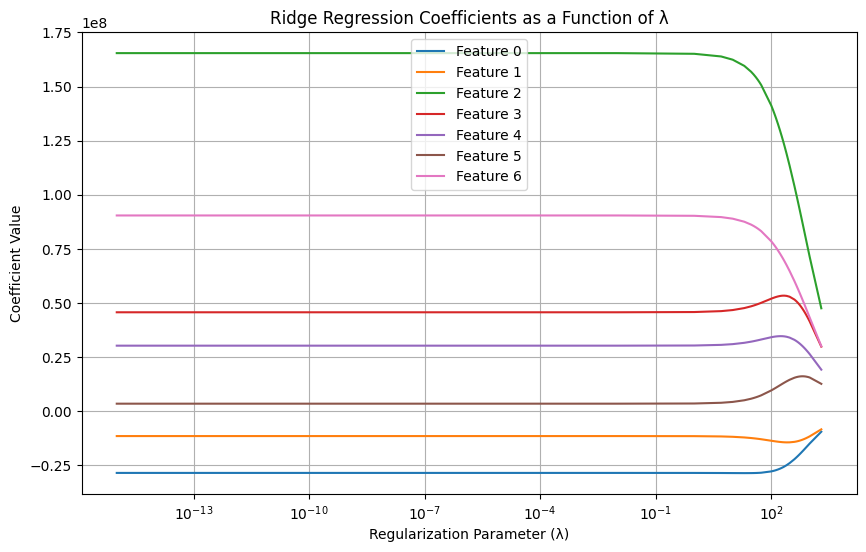

In [254]:
coefficients = []

for alpha in alphas:
    # Create and fit a Ridge regression model
    model = Ridge(alpha=alpha)
    model.fit(X_scaled, y)  # Use your transformed data

    # Get the coefficients for this λ
    coef = model.coef_
    coefficients.append(coef)

# Convert coefficients to a NumPy array
coefficients = np.array(coefficients)

# Create a plot to visualize the coefficients
plt.figure(figsize=(10, 6))
for i in range(coefficients.shape[1]):
    plt.semilogx(alphas, coefficients[:, i], label=f"Feature {i}")
plt.title("Ridge Regression Coefficients as a Function of λ")
plt.xlabel("Regularization Parameter (λ)")
plt.ylabel("Coefficient Value")
plt.legend()
plt.grid()
plt.show()